# Introduction

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [19]:
sns.set()

## 統計モデリングの目的

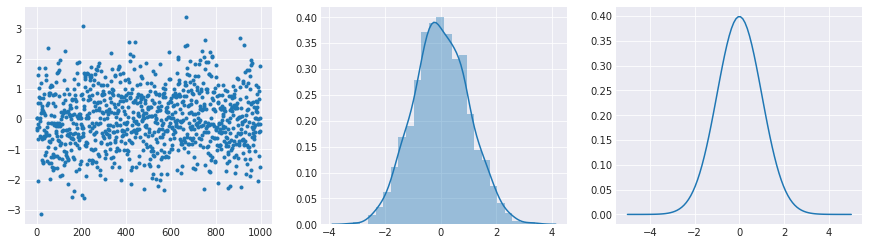

In [2]:
mu = 0.0
sd = 1.0
x = np.linspace(-5, 5, 100)
y = stats.norm(mu, sd).rvs(size=1000)

fig = plt.figure(figsize=(15, 4))
ax = fig.subplots(1,3)
ax[0].plot(y, '.')
sns.distplot(y, ax=ax[1])
ax[2].plot(x, stats.norm.pdf(x, loc=mu, scale=sd))

plt.savefig("norm_sample.png")

## 「AI」と統計モデリング

NNとは、特徴空間上に最も識別効率の高い直線を引くための技術。

識別境界の例。

In [21]:
# メッシュデータを作る
x1_min, x1_max = (-10, 10)
x2_min, x2_max = (-10, 10)
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                               np.arange(x2_min, x2_max, 0.1))
mesh = np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T

(200, 200)


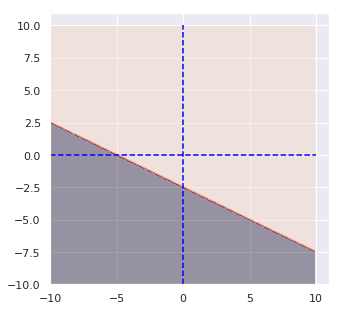

In [25]:
w = [1.0, 2.0]
b = [5.0]

z = np.array([1 if np.dot(w, m)+b > 0 else -1 for m in mesh])
z = z.reshape(x1_mesh.shape)
print(z.shape)


fig = plt.figure(figsize=(5, 5))
ax = fig.subplots(1,1)
ax.contourf(x1_mesh, x2_mesh, z, alpha=0.4)
ax.hlines([0], x1_min, x1_max, "blue", linestyles='dashed')
ax.vlines([0], x2_min, x2_max, "blue", linestyles='dashed')
plt.savefig('classify_bound_sample.png')

irisデータセットを利用して、最もシンプルなNNモデルの学習を体験

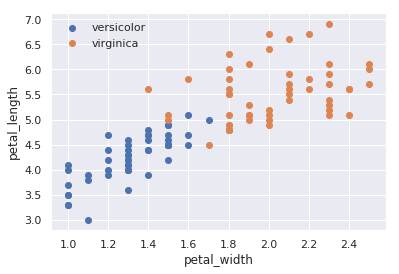

In [42]:
# サンプルデータのロードと可視化
df = sns.load_dataset("iris")

sns.set()
fig = plt.figure()
ax = fig.subplots(1,1)

# 種は3種あるが、今回は簡単のために2種のみ利用
df_1 = df.query('species == "versicolor"')
df_2 = df.query('species == "virginica"')

ax.scatter(df_1['petal_width'], df_1['petal_length'], label='versicolor')
ax.scatter(df_2['petal_width'], df_2['petal_length'], label='virginica')
ax.set_xlabel('petal_width')
ax.set_ylabel('petal_length')
ax.legend()
plt.savefig('iris_2feature.png')

In [50]:
# 学習データと訓練データに分割
df_data = pd.concat([df_1, df_2])
features = ['petal_width', 'petal_length']
X = df_data[features]
Y = [0 if i == 'versicolor' else 1 for i in df_data['species']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [46]:
# 学習
nnc = Perceptron(max_iter=100, tol=None)
nnc.fit(X_train, y_train)
print ("score : ", nnc.score(X_test, y_test))

score :  1.0


/Users/tok41/workspace/seminar_choco/env_sc/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [47]:
# 識別境界を甲斐s化する
x1_min, x1_max = X.iloc[:, 0].min()-0.1, X.iloc[:, 0].max()+0.1
x2_min, x2_max = X.iloc[:, 1].min()-0.1, X.iloc[:, 1].max()+0.1
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                               np.arange(x2_min, x2_max, 0.01))

In [48]:
z = nnc.predict(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T)
z = z.reshape(x1_mesh.shape)

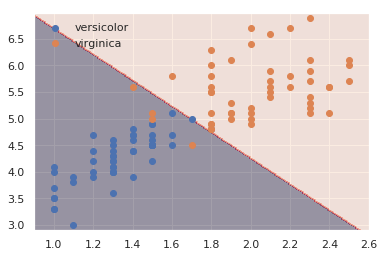

In [49]:
sns.set()
fig = plt.figure()
ax = fig.subplots(1,1)

ax.contourf(x1_mesh, x2_mesh, z, alpha=0.4)
ax.scatter(df_1['petal_width'], df_1['petal_length'], label='versicolor')
ax.scatter(df_2['petal_width'], df_2['petal_length'], label='virginica')
ax.legend()
plt.savefig('iris_2feature_bound.png')